### 4.2 Binning, Discretization, Linear Models and Trees
- Binning: 구간 분할
- Discretization: 이산화

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
print()
for i in range(10):
    print(X[i], y[i])

X.shape: (100, 1)
y.shape: (100,)

[-0.753] -0.397948579888
[ 2.704] 0.710577548576
[ 1.392] 0.413928667214
[ 0.592] -0.348383793651
[-2.064] -1.6020040642
[-2.064] -1.31357098532
[-2.651] -0.124267998446
[ 2.197] 1.13660584523
[ 0.607] 0.226843650048
[ 1.248] -0.107001128918


(1000, 1)


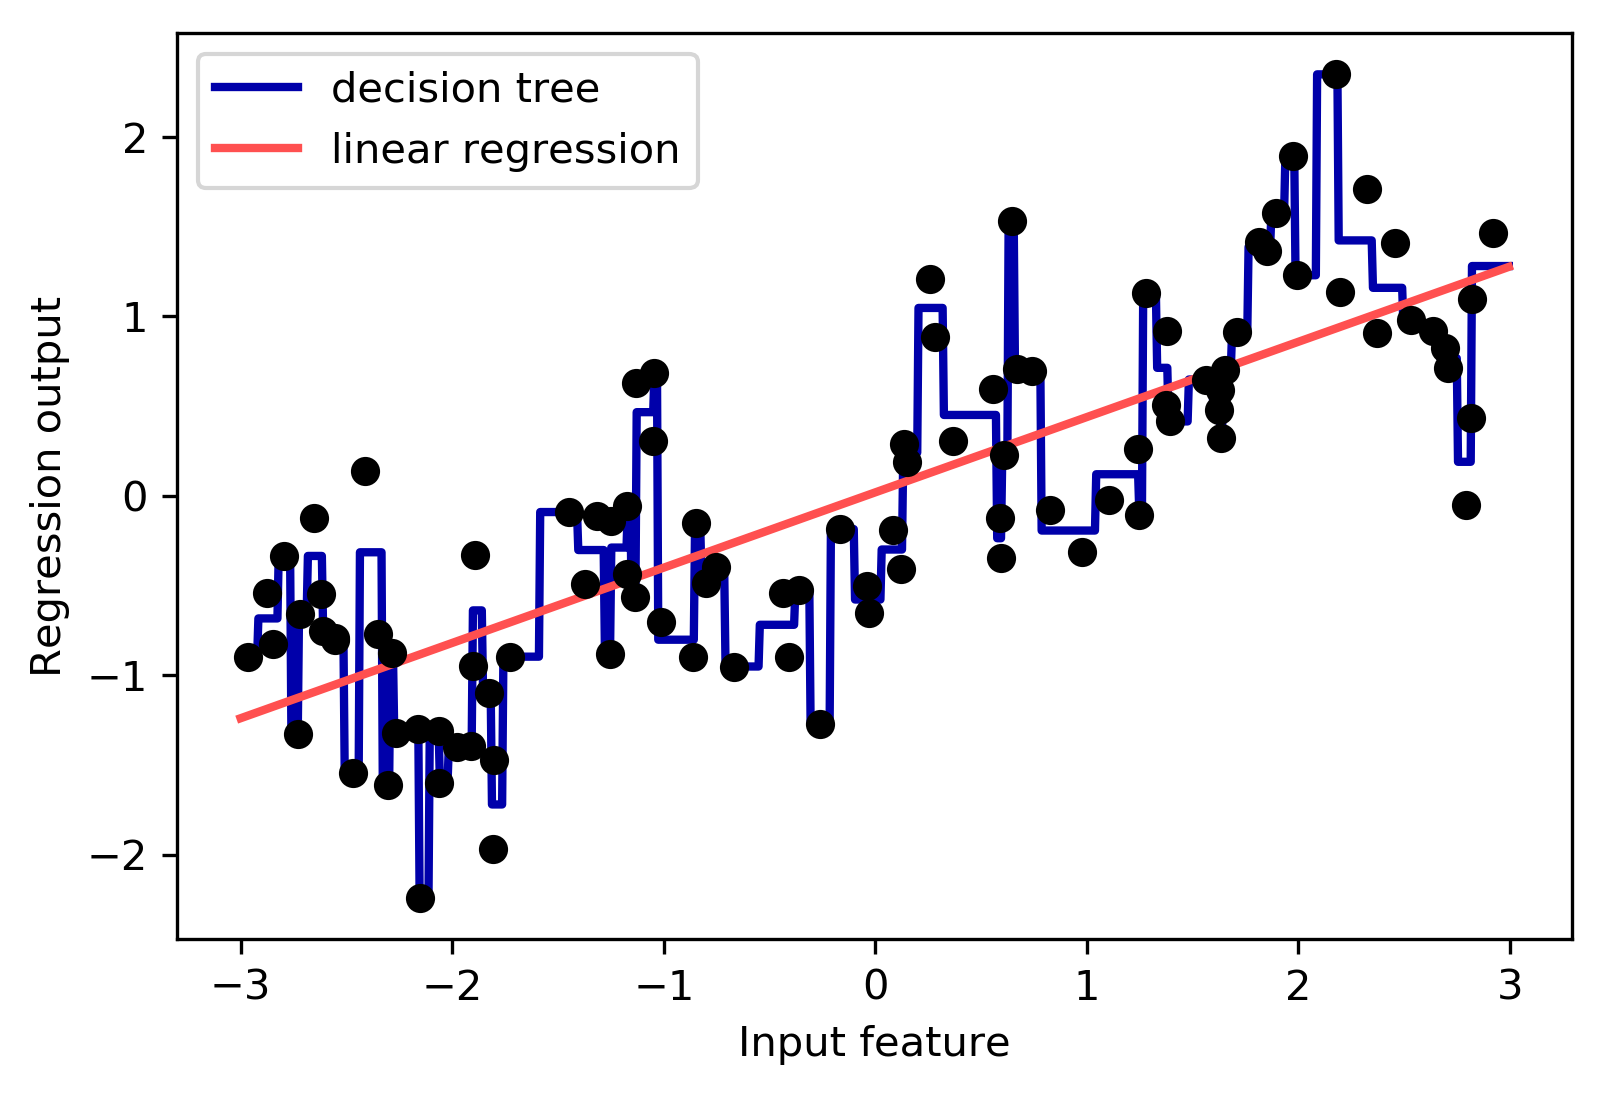

In [14]:
# min_samples_splits
# - The minimum number of samples required to split an internal node
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
print(line.shape)

plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

- 구간 분할 (또는 이산화)
  - 연속형 데이터에 대하여 강력한 선형 모델을 만드는 방법 중 하나

In [15]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


- 첫번째 구간: 1 - [-3. -2.4)
- 두번째 구간: 2 - [-2.4 -1.8)
- ...
- 열번째 구간: 10 - [2.4 3.)

- np.digitize(X, bins)
  - X에 있는 데이터를 bins 기준으로 어느 구간에 속하는지를 기록
  - 즉, 연속형 데이터를 이산형 데이터로 변환

In [16]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


- OneHotEncoder
  - 이산형 데이터를 One Hot 벡터로 변환

In [17]:
from sklearn.preprocessing import OneHotEncoder

# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [18]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


- One Hot 벡터로 인코딩된 데이터로 결정트리모델과 선형회귀모델을 새로 구성

line.shape: (1000, 1)
line_binned.shape: (1000, 10)


Text(0.5,0,'Input feature')

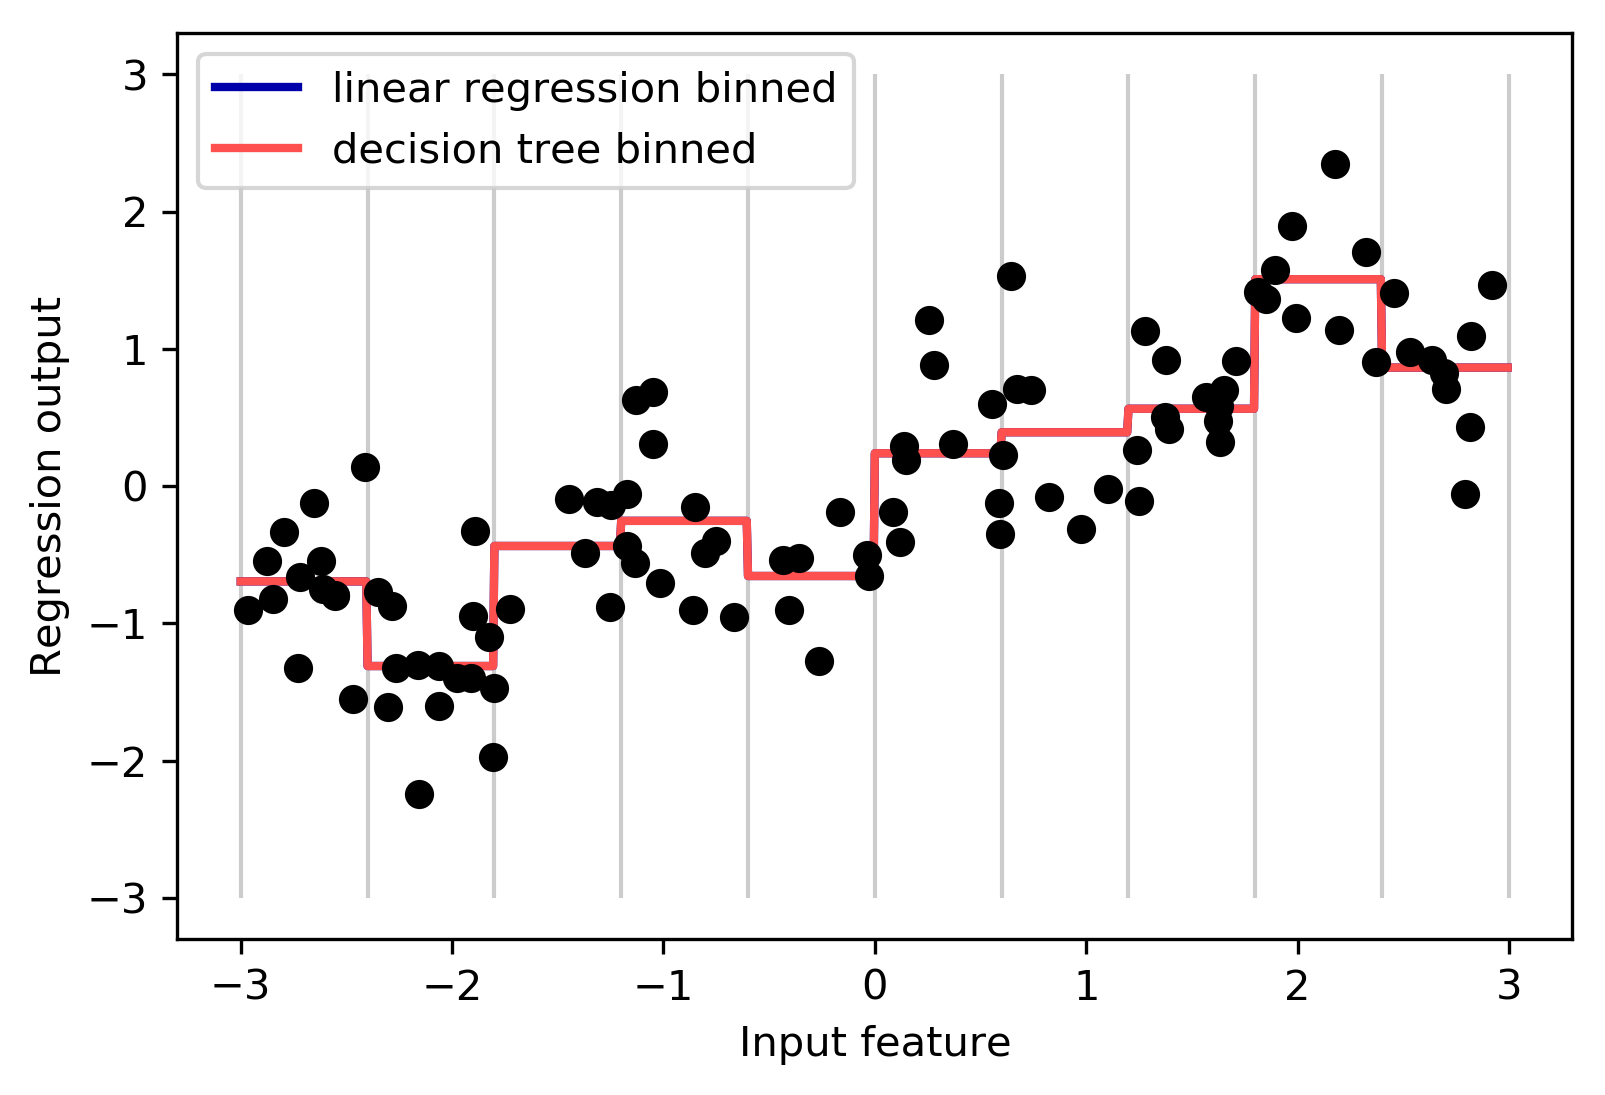

In [19]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
print("line.shape:", line.shape)

line_binned = encoder.transform(np.digitize(line, bins=bins))
print("line_binned.shape:", line_binned.shape)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

- 선형회귀 모델의 결과와 결정트리 모델 결과가 완전히 일치함
- 각 구간안에서는 특성의 값이 상수이므로, 어떤 모델이든 그 구간의 포인트에 대해서는 같은 값을 예측함
- 데이터의 구간화 (binned or digitized) 변환후 동일한 모델에서 학습하였을 때의 결과
  - Linear Regression: 모델이 더 유연해짐 --> 큰 이득
  - DecisionTreeRegressor: 모델이 덜 유연해짐
- 즉, **선형 모델을 사용해야 할 때 데이터 구간화는 모델 성능을 높혀줌**